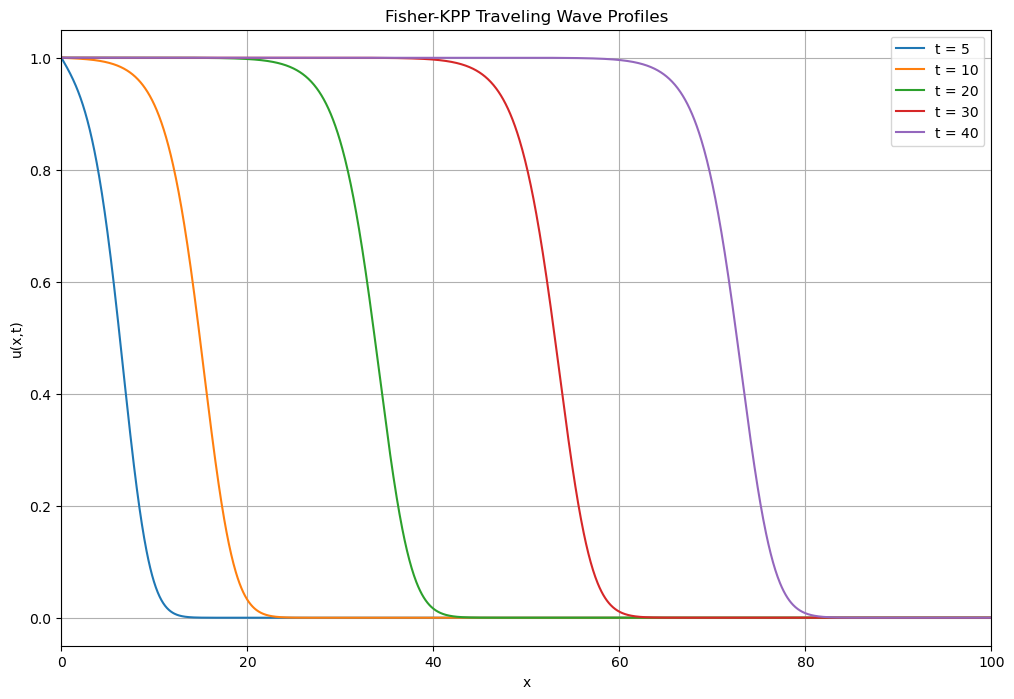


Estimated Wave Speeds (c = Δx / Δt):
From t=5.0 to t=10.0: speed ≈ 1.7209
From t=10.0 to t=20.0: speed ≈ 1.8803
From t=20.0 to t=30.0: speed ≈ 1.9369
From t=30.0 to t=40.0: speed ≈ 1.9573


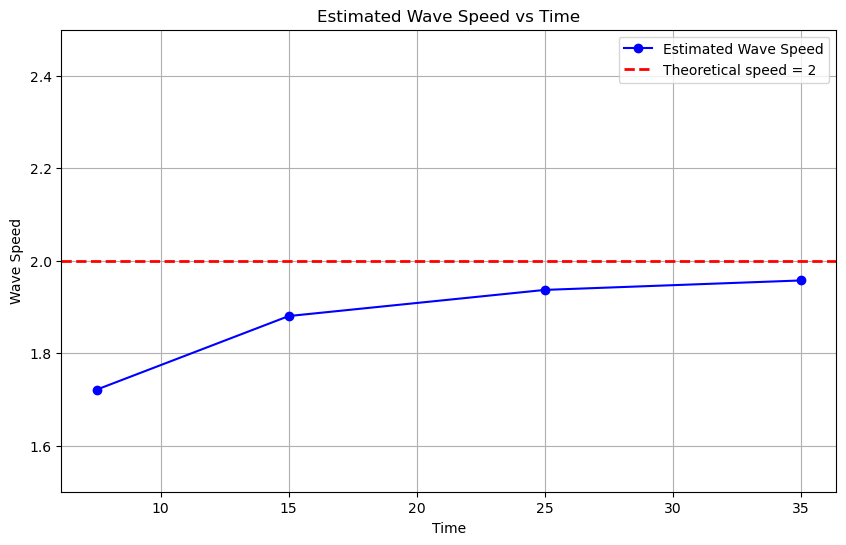

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#Import IPython.display to visualize the mp4
#Import os to create for videos
import IPython.display as ipd
import os

# Constants
L = 200
Nx = 4000
dx = L / Nx
x = np.linspace(0, L, Nx)
T = 50
dt = 0.001
Nt = int(T / dt)
u = np.zeros(Nx)

# Times to save snapshots 
snapshot_times = [5, 10, 20, 30, 40]
snapshot_indices = [int(t / dt) for t in snapshot_times]
snapshots = []
front_positions = []
# Times that are able to satisfy the condition that u(x) = 0.5
valid_times = []

# Fisher-KPP in 1D
def oneD(u, dx):
    d2u = np.zeros_like(u)
    d2u[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    return d2u + u * (1 - u)

# RK4 loop
for n in range(Nt):
    k1 = dt * oneD(u, dx)
    k2 = dt * oneD(u + 0.5 * k1, dx)
    k3 = dt * oneD(u + 0.5 * k2, dx)
    k4 = dt * oneD(u + k3, dx)
    u += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Dirichlet BC
    u[0] = 1 
    u[-1] = 0 

    # Save snapshots and track front position
    if n in snapshot_indices:
        snapshots.append(u.copy())
        
        # Look for u = 0.5
        half_idx = np.where(u <= 0.5)[0]
        if len(half_idx) > 0:
            # Take the first point where u drops below 0.5
            idx = half_idx[0]
            if idx > 0 and idx < Nx - 1:
                # Track the middle of the wave
                x1, x2 = x[idx-1], x[idx]
                y1, y2 = u[idx-1], u[idx]
                if abs(y2 - y1) > 1e-10:  # Avoid division by zero
                    x_half = x1 + (0.5 - y1) * (x2 - x1) / (y2 - y1)
                    front_positions.append(x_half)
                    valid_times.append(n * dt)

# Plot u(x) snapshots
plt.figure(figsize=(12, 8))
for i, u_snap in enumerate(snapshots):
    plt.plot(x, u_snap, label=f't = {snapshot_times[i]}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Fisher-KPP Traveling Wave Profiles')
plt.legend()
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(-0.05, 1.05)
plt.show()

# Compute and plot wave speeds
if len(front_positions) >= 2:
    wave_speeds = []
    mid_times = []
    print("\nEstimated Wave Speeds (c = Δx / Δt):")
    
    for i in range(1, len(front_positions)):
        dx_front = front_positions[i] - front_positions[i - 1]
        dt_front = valid_times[i] - valid_times[i - 1]
        c = dx_front / dt_front
        wave_speeds.append(c)
        mid_times.append(0.5 * (valid_times[i] + valid_times[i - 1]))
        print(f"From t={valid_times[i-1]:.1f} to t={valid_times[i]:.1f}: speed ≈ {c:.4f}")
    
    # Plot wave speed vs. time
    plt.figure(figsize=(10, 6))
    plt.plot(mid_times, wave_speeds, 'bo-', label='Estimated Wave Speed')
    plt.axhline(2.0, color='red', linestyle='--', linewidth=2, label='Theoretical speed = 2')
    plt.xlabel('Time')
    plt.ylabel('Wave Speed')
    plt.title('Estimated Wave Speed vs Time')
    plt.grid(True)
    plt.legend()
    plt.ylim(1.5, 2.5)
    plt.show()


In [12]:
# Constants
u = np.zeros(Nx)
T = 50


# Creates a folder called oneDimesion that the figures will be stored in
if not os.path.exists('oneDimension'):
    os.makedirs('oneDimension')

#Times to save snapshots
time_steps = np.linspace(5,40,25)
snapshot_indices = [int(t / dt) for t in time_steps]
snapshots = []
front_positions = []
# Times that are able to satisfy the condition that u(x) = 0.5
valid_times = []

# RK4 loop
for n in range(Nt):
    k1 = dt * oneD(u, dx)
    k2 = dt * oneD(u + 0.5 * k1, dx)
    k3 = dt * oneD(u + 0.5 * k2, dx)
    k4 = dt * oneD(u + k3, dx)
    u += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Dirichles BC
    u[0] = 1 
    u[-1] = 0 

    # Save snapshots and track front position
    if n in snapshot_indices:
        snapshots.append(u.copy())
        
        # Look for u = 0.5
        half_idx = np.where(u <= 0.5)[0]
        if len(half_idx) > 0:
            # Take the first point where u drops below 0.5
            idx = half_idx[0]
            if idx > 0 and idx < Nx - 1:
                # Track the middle of the wave
                x1, x2 = x[idx-1], x[idx]
                y1, y2 = u[idx-1], u[idx]
                if abs(y2 - y1) > 1e-10:  # Avoid division by zero
                    x_half = x1 + (0.5 - y1) * (x2 - x1) / (y2 - y1)
                    front_positions.append(x_half)
                    valid_times.append(n * dt)

#Creates a NT number of figures and stores then in the folder oneDimension
for i in range(0, len(time_steps)):
    fig = plt.figure(dpi=100, figsize=(6, 6))
    #for i, u_snap in enumerate(snapshots):
    plt.plot(x, snapshots[i], label = f't = {time_steps[i]:.2f}')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.title('Fisher-KPP Traveling Wave Profiles')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 100)
    plt.ylim(-0.05, 1.05)
    plt.legend(loc='upper right')
    #Saves the figure in potintial_time_steps and calls the figures anim_(number)
    plt.savefig(f"oneDimension/anim_{i:03d}.png")
    plt.close(fig)


In [3]:
#Compiles all the figures in the folder oneDimension and saves them as anim.mp4
!ffmpeg -i oneDimension/anim_%03d.png -r 25 -y -pix_fmt yuv420p oneDimension/wave_evolution.mp4 

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [9]:
#Converts the .mp4 file into a .gif file
!ffmpeg -i oneDimension/wave_evolution.mp4 oneDimension/animation.gif

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

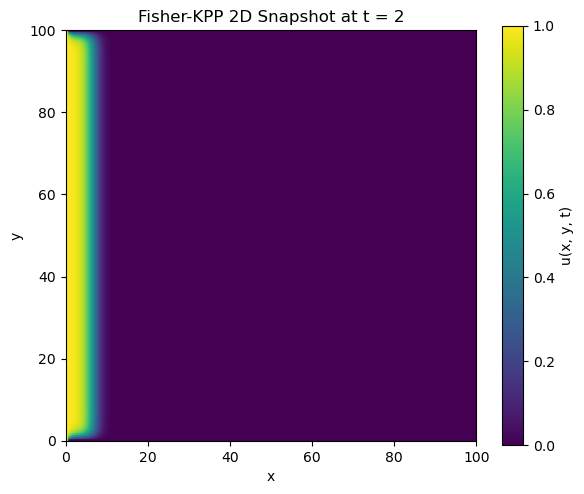

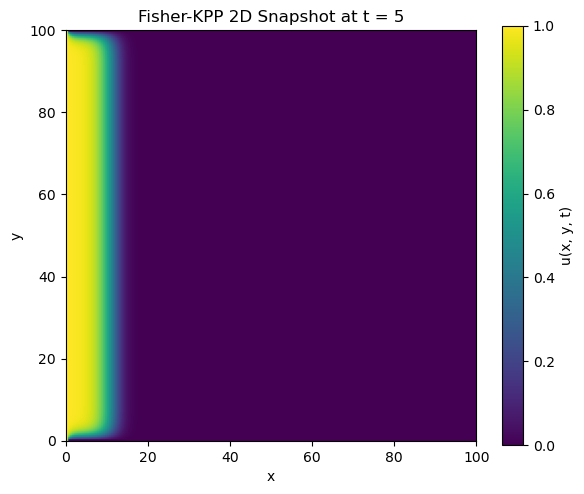

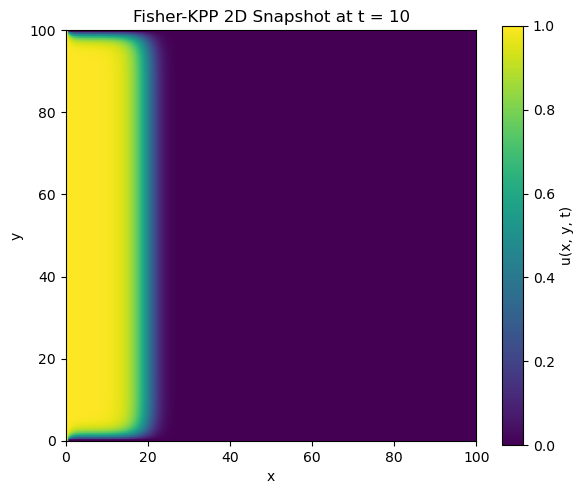

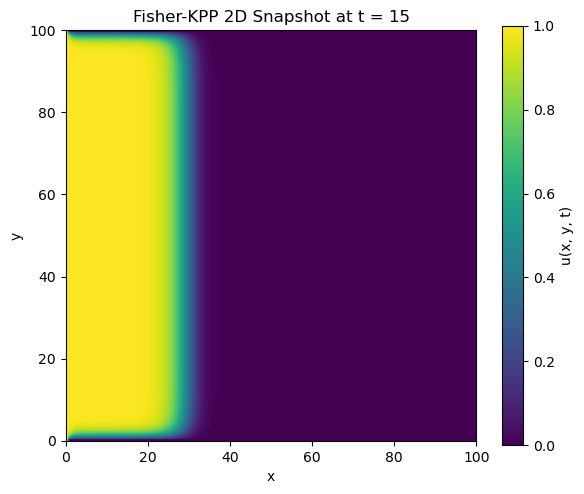


Estimated Wave Speeds (c = Δx / Δt):
From t=5.0 to t=6.5: speed ≈ 1.6306
From t=6.5 to t=7.9: speed ≈ 1.7192
From t=7.9 to t=9.4: speed ≈ 1.7764
From t=9.4 to t=10.8: speed ≈ 1.8157
From t=10.8 to t=12.3: speed ≈ 1.8439
From t=12.3 to t=13.8: speed ≈ 1.8651
From t=13.8 to t=15.2: speed ≈ 1.8815
From t=15.2 to t=16.7: speed ≈ 1.8944
From t=16.7 to t=18.1: speed ≈ 1.9050
From t=18.1 to t=19.6: speed ≈ 1.9136
From t=19.6 to t=21.0: speed ≈ 1.9209
From t=21.0 to t=22.5: speed ≈ 1.9271
From t=22.5 to t=24.0: speed ≈ 1.9324
From t=24.0 to t=25.4: speed ≈ 1.9370
From t=25.4 to t=26.9: speed ≈ 1.9411
From t=26.9 to t=28.3: speed ≈ 1.9446
From t=28.3 to t=29.8: speed ≈ 1.9478
From t=29.8 to t=31.2: speed ≈ 1.9506
From t=31.2 to t=32.7: speed ≈ 1.9531
From t=32.7 to t=34.2: speed ≈ 1.9554
From t=34.2 to t=35.6: speed ≈ 1.9575
From t=35.6 to t=37.1: speed ≈ 1.9594
From t=37.1 to t=38.5: speed ≈ 1.9612
From t=38.5 to t=40.0: speed ≈ 1.9628


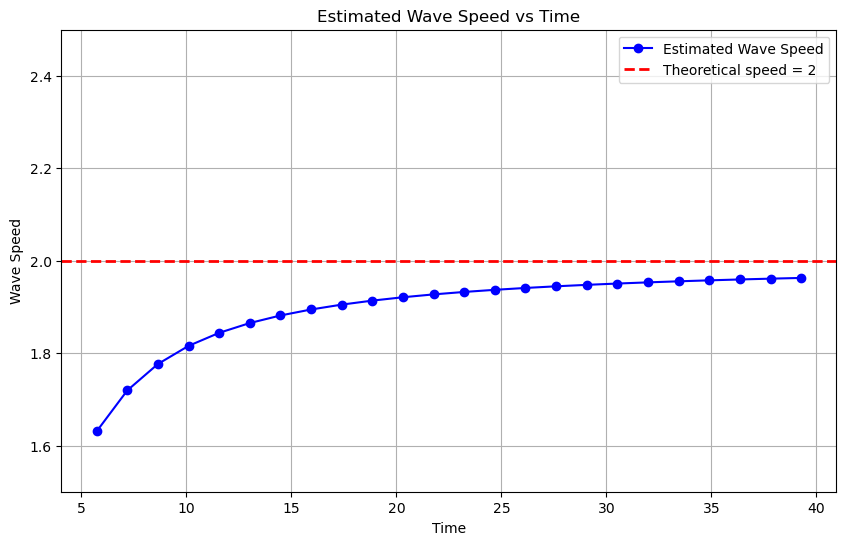

In [13]:
def fisher_kpp_2D():
    # Constants 
    Lx, Ly = 100, 100
    Nx, Ny = 200, 200
    dx, dy = Lx / Nx, Ly / Ny
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)
    T = 20
    dt = 0.001
    Nt = int(T / dt)

    # Initial condition
    u = np.zeros((Ny, Nx))
    # Populate left edge
    u[:, x < 5] = 1.0  

    # Fisher-KPP in 2D
    def twoD(u, dx, dy):
        d2u = np.zeros_like(u)
        d2u[1:-1, 1:-1] = (
            (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1]) / dy**2 +
            (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) / dx**2
        )
        return d2u + u * (1 - u)

    # Times to save snapshots
    snapshot_times = [2, 5, 10, 15, 20]
    snapshot_indices = [int(t / dt) for t in snapshot_times]
    snapshots_2D = []

    # RK4 Time loop
    for n in range(Nt):
        k1 = dt * twoD(u, dx, dy)
        k2 = dt * twoD(u + 0.5 * k1, dx, dy)
        k3 = dt * twoD(u + 0.5 * k2, dx, dy)
        k4 = dt * twoD(u + k3, dx, dy)
        u += (k1 + 2 * k2 + 2 * k3 + k4) / 6

        # Dirichlet BC
        u[0, :] = u[-1, :] = 0
        u[:, 0] = 1.0
        u[:, -1] = 0.0

        # Save snapshots
        if n in snapshot_indices:
            snapshots_2D.append(u.copy())

    # Plot 2D Snapshots
    for i, u_snap in enumerate(snapshots_2D):
        plt.figure(figsize=(6, 5))
        plt.imshow(u_snap, origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=1, cmap='viridis')
        plt.title(f'Fisher-KPP 2D Snapshot at t = {snapshot_times[i]}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='u(x, y, t)')
        plt.tight_layout()
        plt.show()

        
        # Look for u = 0.5
        half_idx = np.where(u <= 0.5)[0]
        if len(half_idx) > 0:
            # Take the first point where u drops below 0.5
            idx = half_idx[0]
            if idx > 0 and idx < Nx - 1:
                # Track the middle of the wave
                x1, x2 = x[idx-1], x[idx]
                y1, y2 = u[idx-1], u[idx]
                if abs(y2 - y1) > 1e-10:  # Avoid division by zero
                    x_half = x1 + (0.5 - y1) * (x2 - x1) / (y2 - y1)
                    front_positions.append(x_half)
                    valid_times.append(n * dt)


# Run the 2D simulation
fisher_kpp_2D()

# Compute and plot wave speeds
if len(front_positions) >= 2:
    wave_speeds = []
    mid_times = []
    print("\nEstimated Wave Speeds (c = Δx / Δt):")
    
    for i in range(1, len(front_positions)):
        dx_front = front_positions[i] - front_positions[i - 1]
        dt_front = valid_times[i] - valid_times[i - 1]
        c = dx_front / dt_front
        wave_speeds.append(c)
        mid_times.append(0.5 * (valid_times[i] + valid_times[i - 1]))
        print(f"From t={valid_times[i-1]:.1f} to t={valid_times[i]:.1f}: speed ≈ {c:.4f}")
    
    # Plot wave speed vs. time
    plt.figure(figsize=(10, 6))
    plt.plot(mid_times, wave_speeds, 'bo-', label='Estimated Wave Speed')
    plt.axhline(2.0, color='red', linestyle='--', linewidth=2, label='Theoretical speed = 2')
    plt.xlabel('Time')
    plt.ylabel('Wave Speed')
    plt.title('Estimated Wave Speed vs Time')
    plt.grid(True)
    plt.legend()
    plt.ylim(1.5, 2.5)
    plt.show()



/tmp/ipykernel_263/2869446019.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 5))


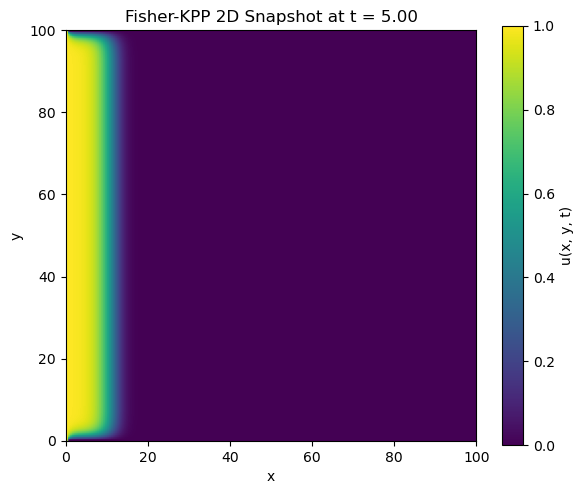

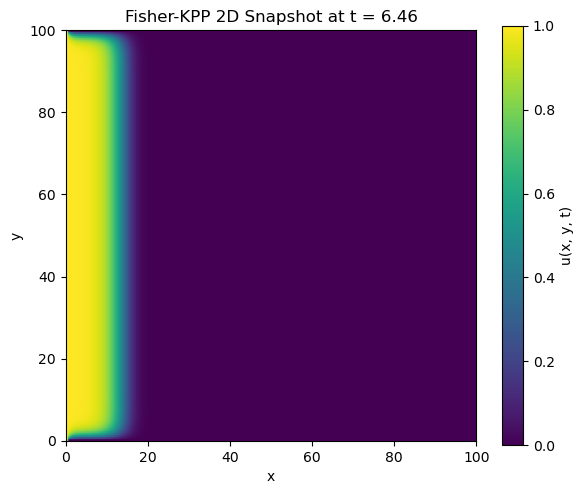

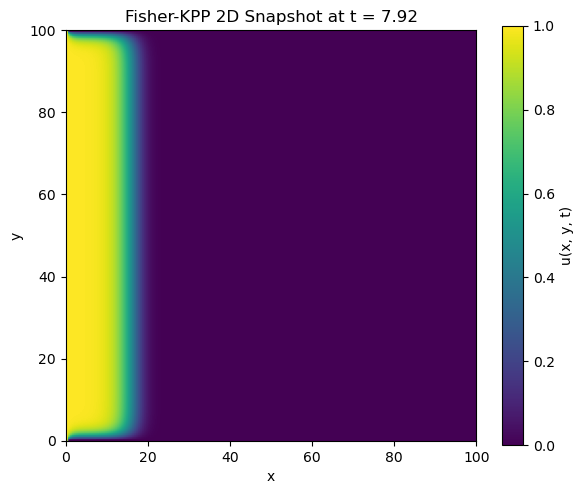

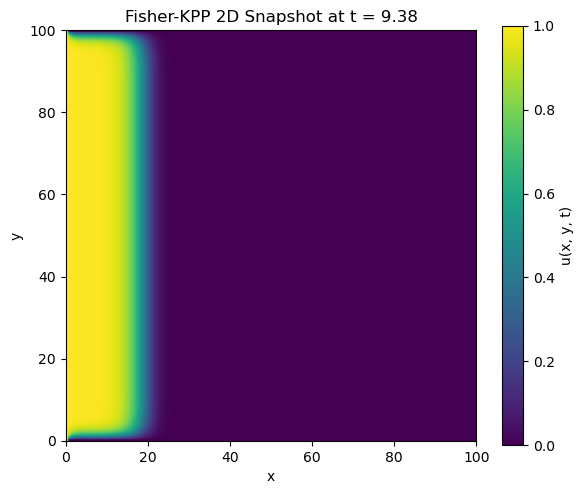

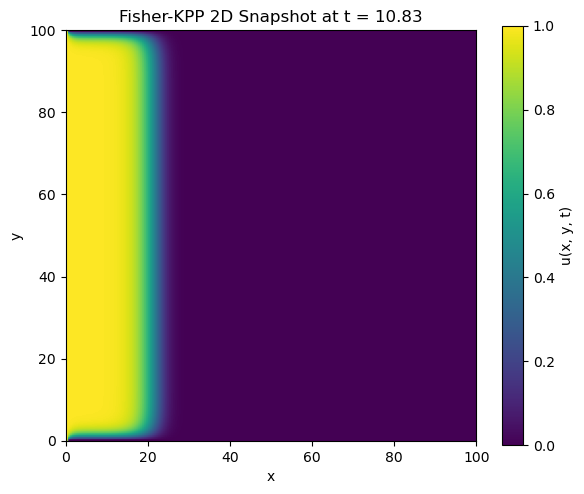

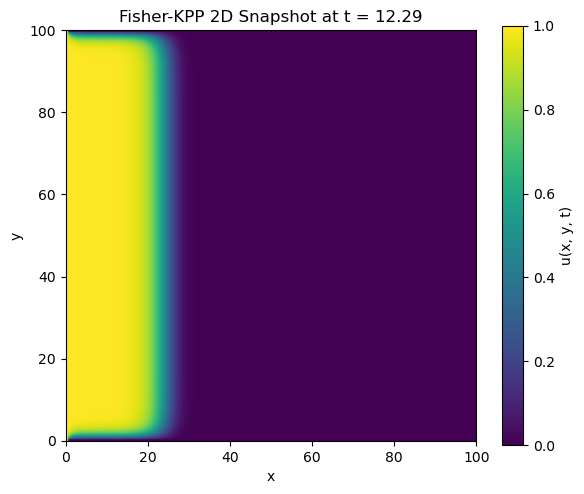

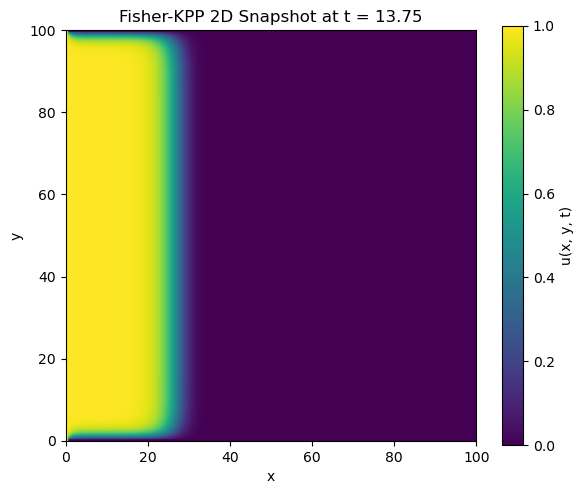

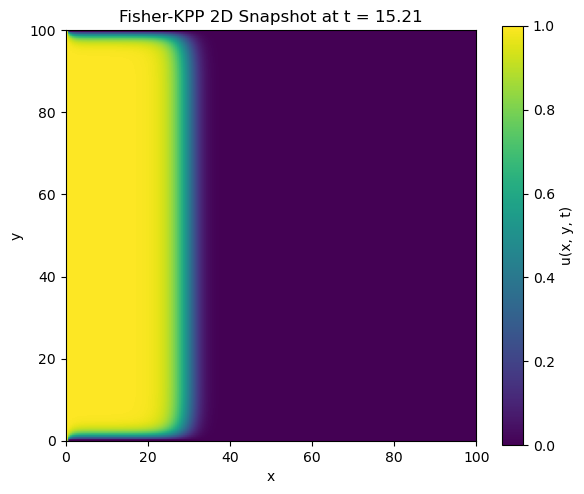

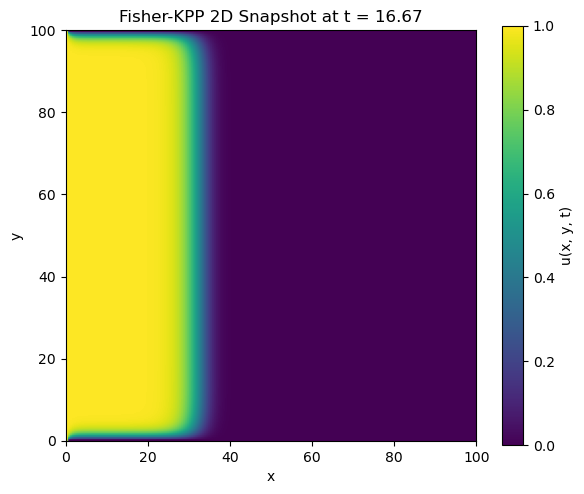

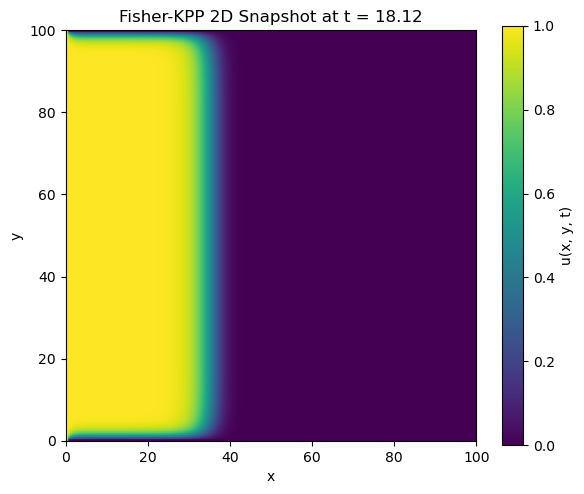

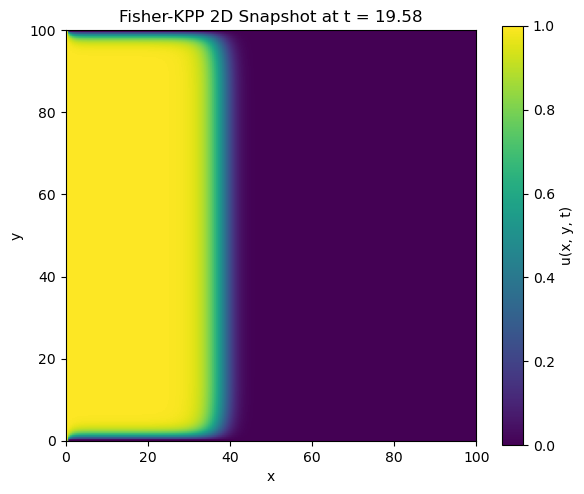

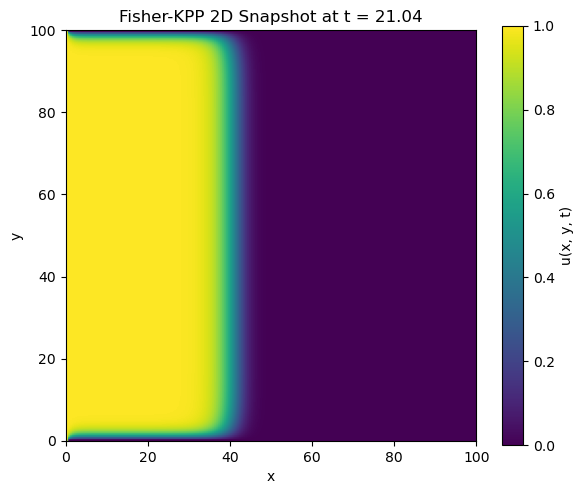

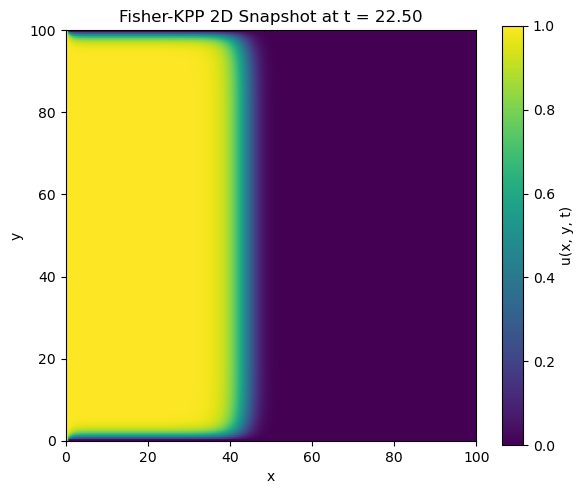

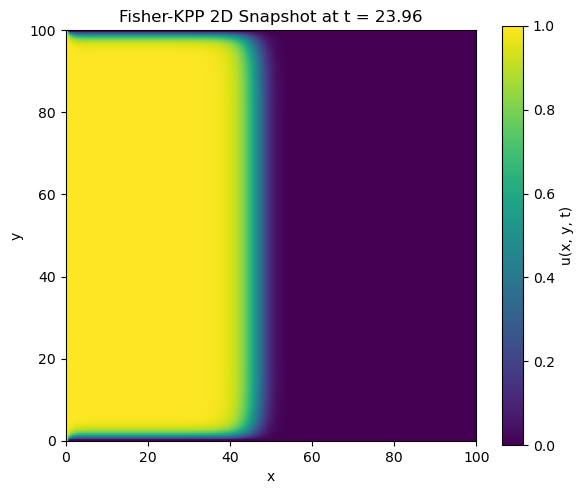

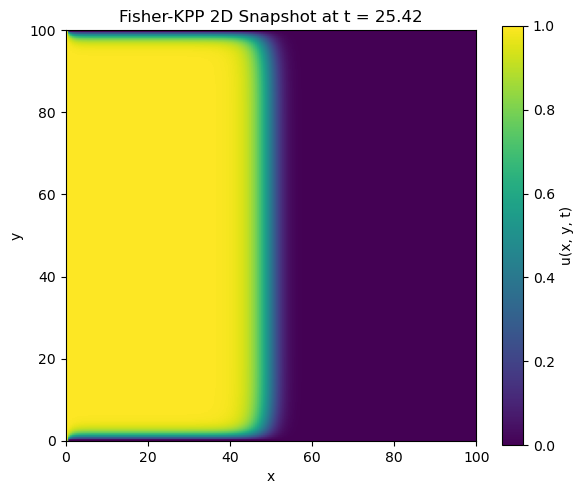

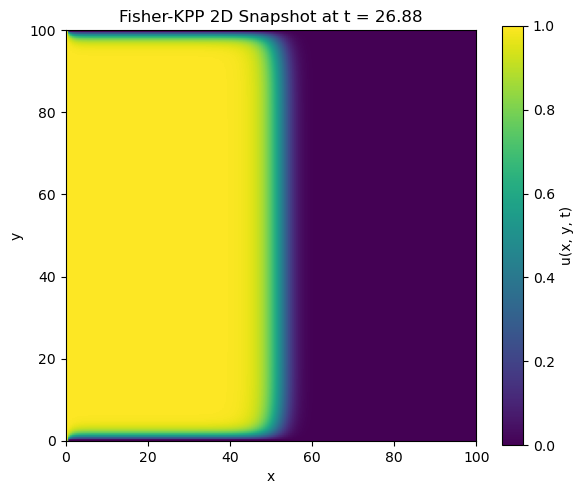

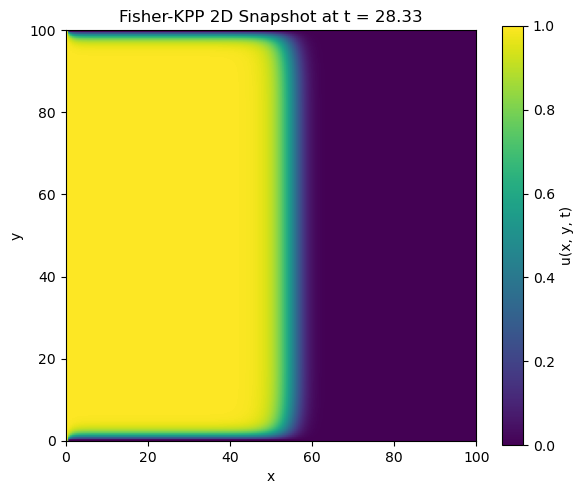

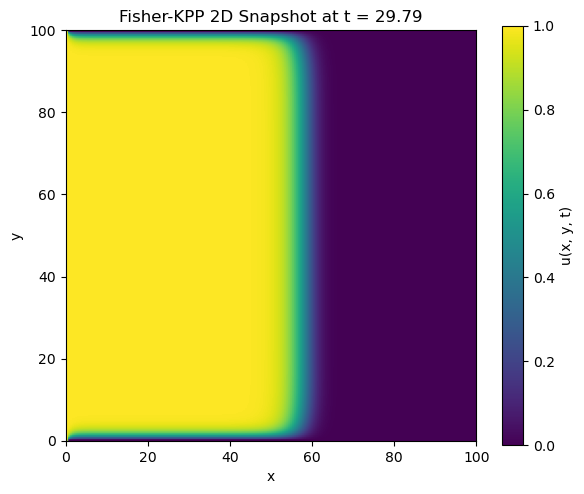

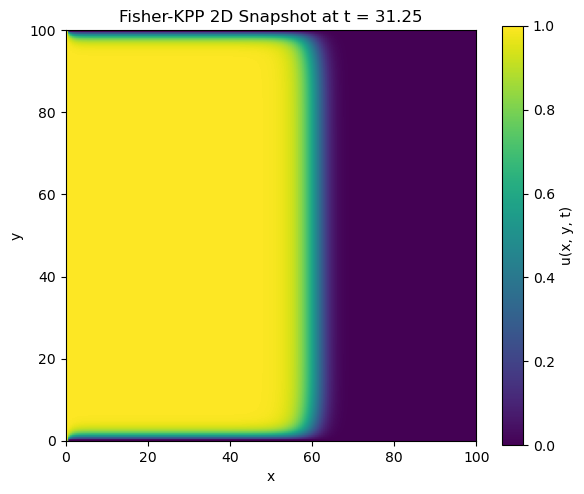

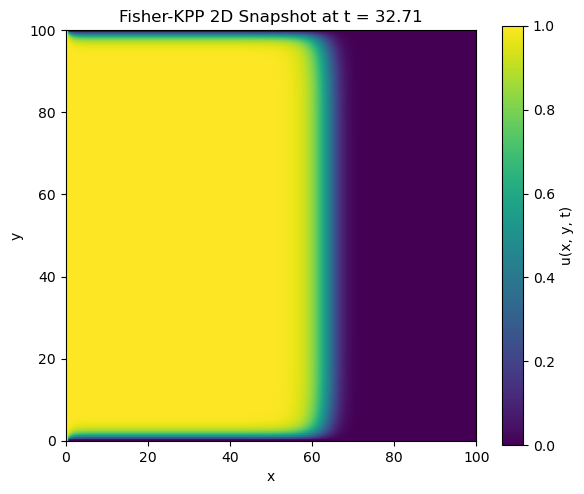

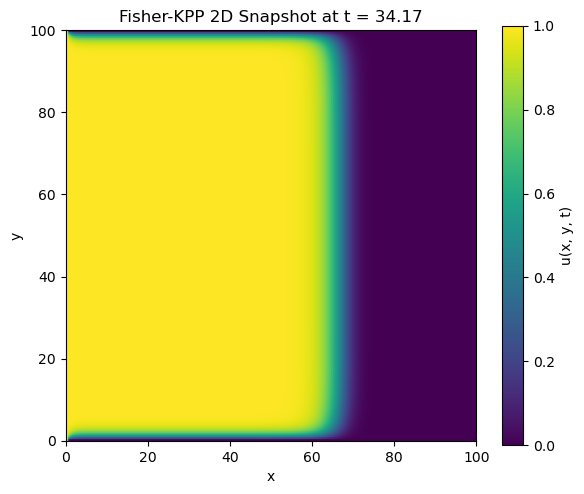

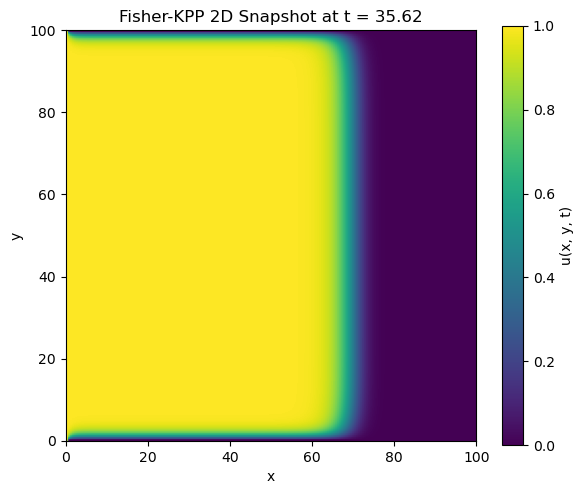

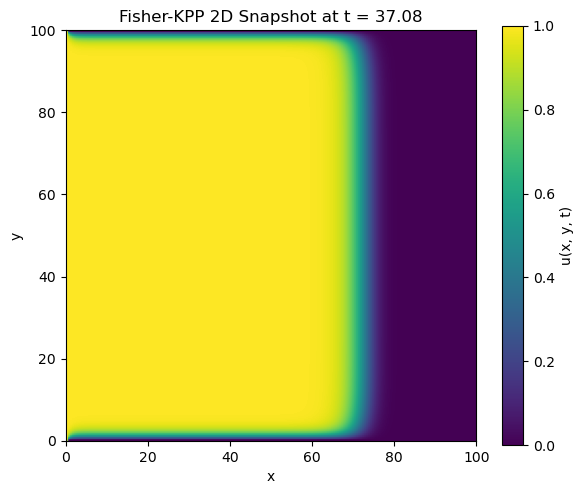

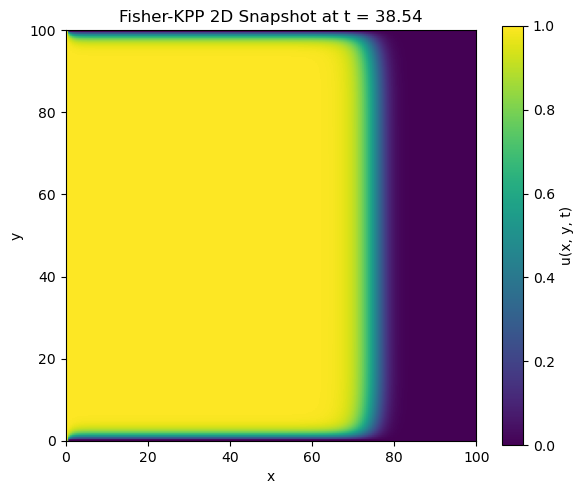

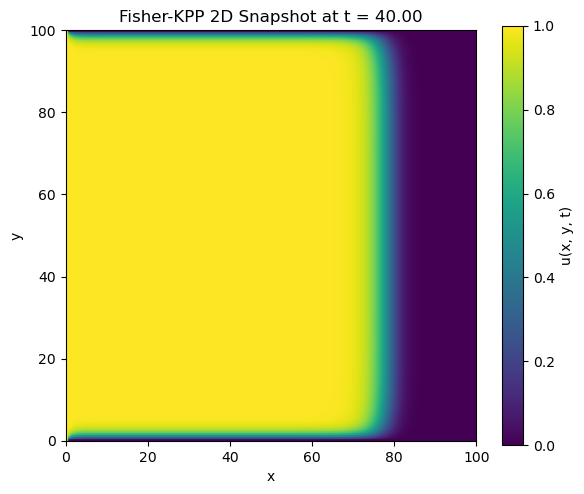

In [14]:
def fisher_kpp_2D_animation():
    # Constants 
    Lx, Ly = 100, 100
    Nx, Ny = 200, 200
    dx, dy = Lx / Nx, Ly / Ny
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)
    T = 50
    dt = 0.001
    Nt = int(T / dt)

    # Initial condition
    u = np.zeros((Ny, Nx))
    # Populate left edge
    u[:, x < 5] = 1.0  

    # 2D Fisher-KPP operator 
    def twoD(u, dx, dy):
        d2u = np.zeros_like(u)
        d2u[1:-1, 1:-1] = (
            (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1]) / dy**2 +
            (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) / dx**2
        )
        return d2u + u * (1 - u)

    # Snapshot settings 
    snapshot_times = np.linspace(5,40,25)
    snapshot_indices = [int(t / dt) for t in snapshot_times]
    snapshots_2D = []

    # RK4 Time loop
    for n in range(Nt):
        k1 = dt * twoD(u, dx, dy)
        k2 = dt * twoD(u + 0.5 * k1, dx, dy)
        k3 = dt * twoD(u + 0.5 * k2, dx, dy)
        k4 = dt * twoD(u + k3, dx, dy)
        u += (k1 + 2 * k2 + 2 * k3 + k4) / 6

        # Dirichlet Boundary Conditions
        u[0, :] = u[-1, :] = 0
        u[:, 0] = 1.0
        u[:, -1] = 0.0

        # Save snapshots
        if n in snapshot_indices:
            snapshots_2D.append(u.copy())
    
    
    # Plot 2D Snapshots
    for i, u_snap in enumerate(snapshots_2D):
        plt.figure(figsize=(6, 5))
        plt.imshow(u_snap, origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=1, cmap='viridis')
        plt.title(f'Fisher-KPP 2D Snapshot at t = {snapshot_times[i]:.2f}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='u(x, y, t)')
        plt.tight_layout()
        #Saves the figure in potintial_time_steps and calls the figures animTwoDim_(number)
        plt.savefig(f"twoDimensionLine/animTwoDim_{i:03d}.png")


# Creates a folder called oneDimesion that the figures will be stored in
if not os.path.exists('twoDimensionLine'):
    os.makedirs('twoDimensionLine')


time_steps = np.linspace(5,40,25)
snapshot_indices = [int(t / dt) for t in time_steps]
snapshots = []
front_positions = []
# Times that are able to satisfy the condition that u(x) = 0.5
valid_times = []

# Run the 2D simulation
fisher_kpp_2D_animation()

In [15]:
#Compiles all the figures in the folder oneDimension and saves them as anim.mp4
!ffmpeg -i twoDimensionLine/animTwoDim_%03d.png -r 25 -y -pix_fmt yuv420p twoDimensionLine/line_evolution.mp4 

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [16]:
# Converts the .mp4 file into a .gif file
!ffmpeg -i twoDimensionLine/line_evolution.mp4 twoDimensionLine/line_animation.gif

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

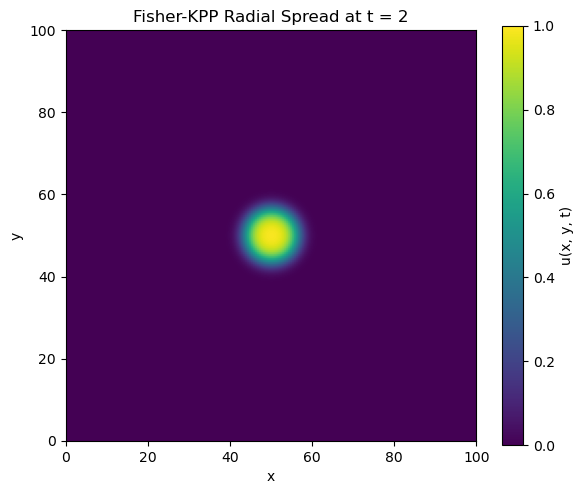

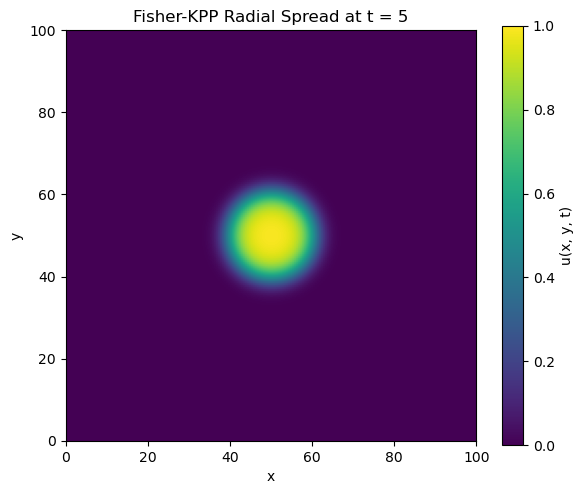

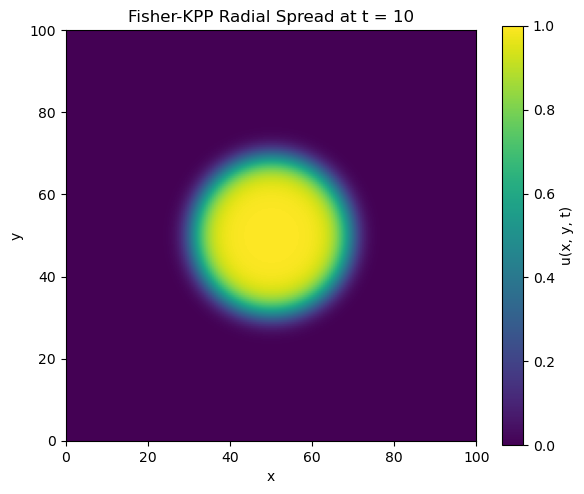

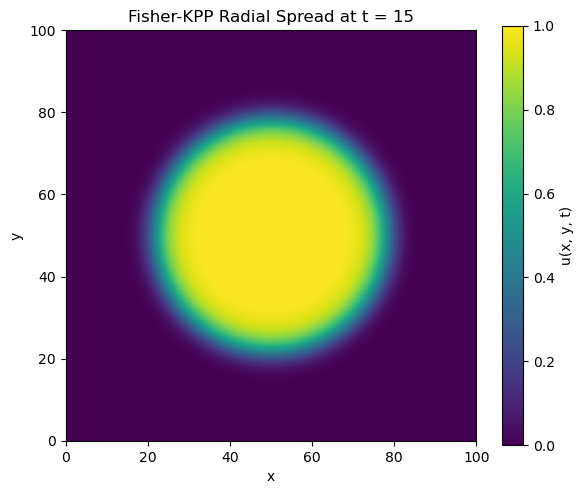

In [17]:
def fisher_kpp_2D_radial():
    # Parameters 
    Lx, Ly = 100, 100
    Nx, Ny = 200, 200
    dx, dy = Lx / Nx, Ly / Ny
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    T = 20
    dt = 0.001
    Nt = int(T / dt)

    # Initial condition: circular population at center 
    u = np.zeros((Ny, Nx))
    center_x, center_y = Lx / 2, Ly / 2
    radius = 5  # Radius of initial population
    disk_center = (X - center_x)**2 + (Y - center_y)**2 < radius**2
    u[disk_center] = 1.0  # Saturate inside the circle

    # Fisher-KPP operator in 2D 
    def twoD(u, dx, dy):
        d2u = np.zeros_like(u)
        d2u[1:-1, 1:-1] = (
            (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1]) / dy**2 +
            (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) / dx**2
        )
        return d2u + u * (1 - u)

    # Snapshot settings 
    snapshot_times = [2, 5, 10, 15, 20]
    snapshot_indices = [int(t / dt) for t in snapshot_times]
    snapshots_2D = []

    # RK4 Time loop 
    for n in range(Nt):
        k1 = dt * twoD(u, dx, dy)
        k2 = dt * twoD(u + 0.5 * k1, dx, dy)
        k3 = dt * twoD(u + 0.5 * k2, dx, dy)
        k4 = dt * twoD(u + k3, dx, dy)
        u += (k1 + 2 * k2 + 2 * k3 + k4) / 6

        # Dirichlet BC
        u[0, :] = u[-1, :] = 0
        u[:, 0] = u[:, -1] = 0

        if n in snapshot_indices:
            snapshots_2D.append(u.copy())

    # Plot snapshots 
    for i, u_snap in enumerate(snapshots_2D):
        plt.figure(figsize=(6, 5))
        plt.imshow(u_snap, origin='lower', extent=[0, Lx, 0, Ly],
                   vmin=0, vmax=1, cmap='viridis')
        plt.title(f'Fisher-KPP Radial Spread at t = {snapshot_times[i]}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='u(x, y, t)')
        plt.tight_layout()
        plt.show()


# Run the 2D radial simulation
fisher_kpp_2D_radial()

In [ ]:
def fisher_kpp_2D_disk_animation():
    # Parameters 
    Lx, Ly = 100, 100
    Nx, Ny = 200, 200
    dx, dy = Lx / Nx, Ly / Ny
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    T = 50
    dt = 0.001
    Nt = int(T / dt)

    # Initial condition: circular population at center 
    u = np.zeros((Ny, Nx))
    center_x, center_y = Lx / 2, Ly / 2
    radius = 5  # Radius of initial population
    disk_center = (X - center_x)**2 + (Y - center_y)**2 < radius**2
    u[disk_center] = 1.0  # Saturate inside the circle

    # Fisher-KPP operator in 2D 
    def twoD(u, dx, dy):
        d2u = np.zeros_like(u)
        d2u[1:-1, 1:-1] = (
            (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1]) / dy**2 +
            (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) / dx**2
        )
        return d2u + u * (1 - u)

    # Snapshot settings 
    snapshot_times = np.linspace(5,40,25)
    snapshot_indices = [int(t / dt) for t in snapshot_times]
    snapshots_2D = []

    # RK4 Time loop 
    for n in range(Nt):
        k1 = dt * twoD(u, dx, dy)
        k2 = dt * twoD(u + 0.5 * k1, dx, dy)
        k3 = dt * twoD(u + 0.5 * k2, dx, dy)
        k4 = dt * twoD(u + k3, dx, dy)
        u += (k1 + 2 * k2 + 2 * k3 + k4) / 6

        # Dirichlet BCs
        u[0, :] = u[-1, :] = 0
        u[:, 0] = u[:, -1] = 0

        if n in snapshot_indices:
            snapshots_2D.append(u.copy())

    # Plot 2D Snapshots
    for i, u_snap in enumerate(snapshots_2D):
        plt.figure(figsize=(6, 5))
        plt.imshow(u_snap, origin='lower', extent=[0, Lx, 0, Ly], vmin=0, vmax=1, cmap='viridis')
        plt.title(f'Fisher-KPP 2D Snapshot at t = {snapshot_times[i]:.2f}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='u(x, y, t)')
        plt.tight_layout()
        #Saves the figure in potintial_time_steps and calls the figures animTwoDim_(number)
        plt.savefig(f"twoDimensionDisk/animTwoDim_{i:03d}.png")


# Creates a folder called oneDimesion that the figures will be stored in
if not os.path.exists('twoDimensionDisk'):
    os.makedirs('twoDimensionDisk')



front_positions = []
# Times that are able to satisfy the condition that u(x) = 0.5
valid_times = []

# Run the 2D simulation
fisher_kpp_2D_disk_animation()

In [13]:
#Compiles all the figures in the folder oneDimension and saves them as anim.mp4
!ffmpeg -i twoDimensionDisk/animTwoDim_%03d.png -r 25 -y -pix_fmt yuv420p twoDimensionDisk/Disk_evolution.mp4 

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [14]:
!ffmpeg -i twoDimensionDisk/Disk_evolution.mp4 twoDimensionDisk/Disk_animation.gif

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab